In [2]:
from IPython.display import display, HTML
import spot
from spot.jupyter import display_inline # display multiple arguments side-by-side
import buddy
spot.setup(show_default='.tvb')

In [3]:
ltl2dpa_spec = "((Fa & Fb & GFp0) | (FG!p0 & (G!a | G!b))) & G((p0 & !p1) | (!p0 & p1))"
ltl2dpa_auto = spot.translate(ltl2dpa_spec)
display_inline(ltl2dpa_auto)

In [4]:
ltl2dpa_neg_spec = "!("+ ltl2dpa_spec +")"
ltl2dpa_neg_auto = spot.translate(ltl2dpa_neg_spec)
display_inline(ltl2dpa_neg_auto)

In [5]:
spot.product(ltl2dpa_neg_auto, ltl2dpa_auto).is_empty()

True

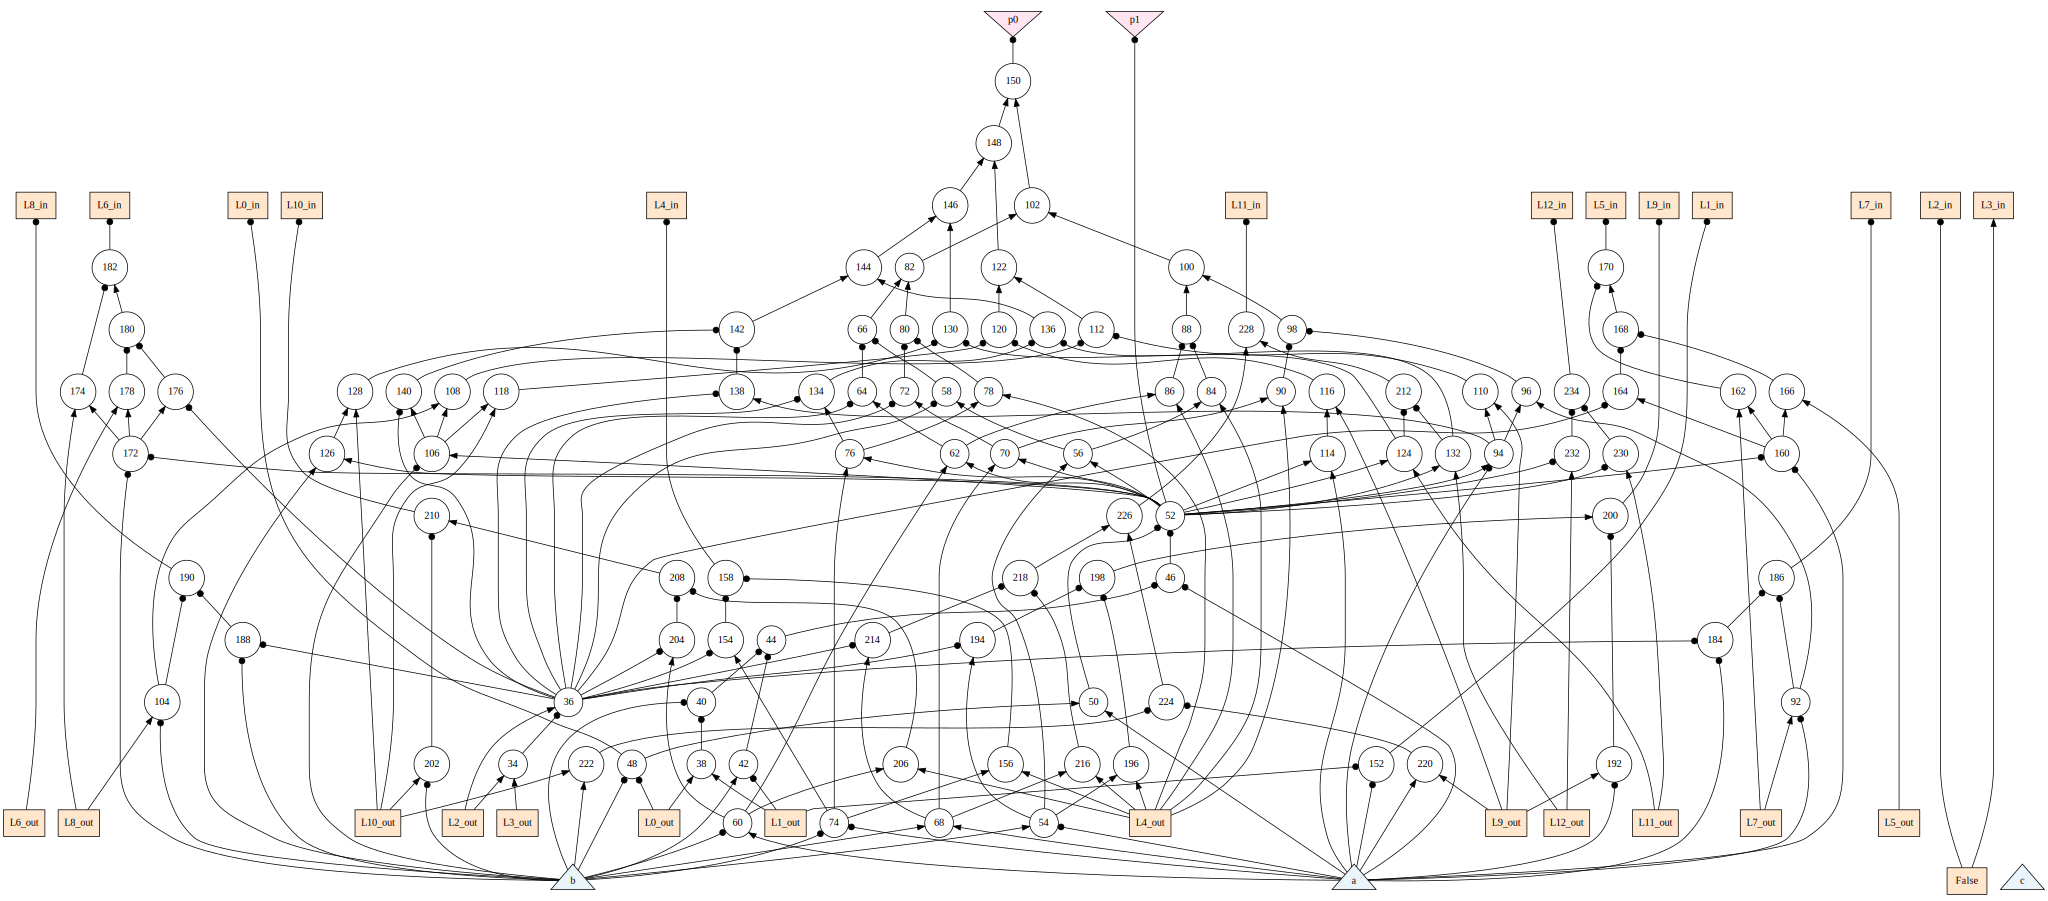

In [9]:
ltl2dpa_strat = spot.aig_parse_aag('./ltl2dpa16.aag', ltl2dpa_neg_auto.get_dict())
display(ltl2dpa_strat)

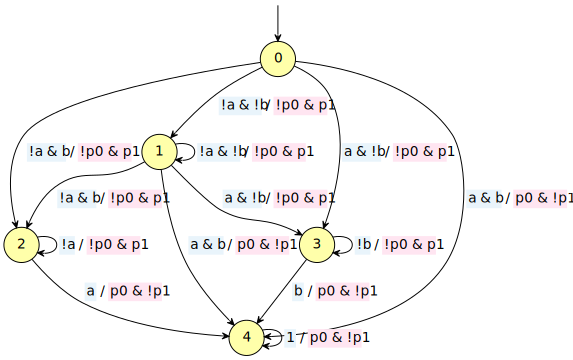

In [11]:
ltl2dpa_strat_auto = ltl2dpa_strat.as_automaton(False)
display(ltl2dpa_strat_auto)

In [12]:
# spot.product(ltl2dpa_neg_auto, ltl2dpa_strat_auto).scc_filter()
spot.product(ltl2dpa_neg_auto, ltl2dpa_strat_auto).is_empty()

True